<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/5_1_%EC%B5%9C%EC%A0%81%ED%99%94_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 기본 셋팅

In [1]:
import numpy as np

# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams.update({"axes.grid" : True})

plt.rcParams["figure.figsize"] = (15,9)
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

np.random.seed(42)

# %config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


### 1) 최적화 문제

- 최적화 문제 : 함수 $f$의 값을 최대화 혹은 최소화하는 변수 $x$의 값 $x^{\ast}$를 찾는 것
> $$ 
\begin{align}
x^{\ast} = \arg \max_x f(x) \;\; \text{ or } \;\; x^{\ast} = \arg \min_x f(x) 
\end{align}
$$
> - $x^{\ast}$ : 최적화 문제의 **해(solution)** (보통은 최소화 문제만 고려)

- 최소화하려는 함수 $f(x)$
> - 목적함수(objective) $J$ = 비용함수(cost) $C$ = 손실함수(loss) $L$ = 오차함수(error) $E$

#### 예제

다음은 1차원 목적함수의 예. 그래프에서 이 목적함수 $f_1(x)$의 최저점은 $x^{\ast}=2$임을 알 수 있다.
> $$
\begin{align}
f(x) = (x -2 )^2 + 2
\end{align}
$$

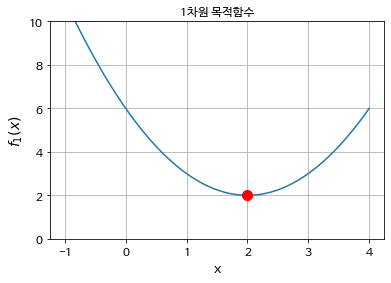

In [2]:
def f1(x):
    return (x - 2) ** 2 + 2

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=10)
plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("1차원 목적함수")
plt.show()

#### 예제

- 다음 함수 $f_2(x, y)$는 2차원 목적함수의 예로 2차원 로젠브록(Rosenbrock) 함수라고 한다. 2차원 로젠브록  함수는 $x^{\ast}, y^{\ast} = (1, 1)$에서 최솟값을 가진다.
> $$
\begin{align}
f(x, y) = (1 − x )^2 + 100(y − x^2)^2
\end{align}
$$

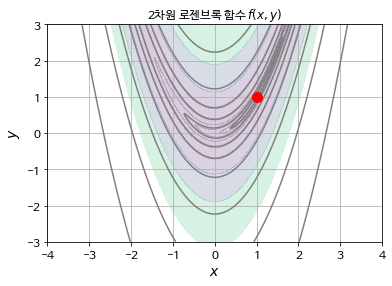

In [3]:
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels=np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2차원 로젠브록 함수 $f(x,y)$")
plt.show()

### 2) 그리드 서치와 수치적 최적화

- 그리드 서치(grid search) : 목적함수의 값을 가장 작게 하는 $x$의 값을 여러개 넣어보고 그 중 가장 작은 값을 선택하는 방법
> - 함수 $f_1(x)$의 그래프를 그려 최저점을 찾은 방법도 그리드 서치 방법의 일종
> - 가장 간단하지만 많은 $x$ 위치에 대해 목적 함숫값을 계산 필요 ($f_1(x)$의 최저점을 찾을 때는 함수 계산을 100번 수행)
→ 그리드 서치보다 목적함수 계산을 적게 할 수 있는 방법이 필요하다. 

- 수치적 최적화(numerical optimization) : 반복적 시행 착오(trial and error)에 의해 최적화 필요조건을 만족하는 값 $x^{\ast}$를 찾는 방법. 위치가 최적점이 될 때까지 가능한 한 적은 횟수만큼 $x$ 위치를 옮기는 방법
> 두 가지 알고리즘을 요구
> * 1. 현재 위치 $x_k$가 최적점인지 판단하는 알고리즘
> * 2. 어떤 위치 $x_k$를 시도한 뒤, 다음 번에 시도할 위치 $x_{k+1}$을 찾는 알고리즘


### 3) 기울기 필요조건 (수치적 최적화의 1. 알고리즘)

- 기울기 필요조건 : 다음과 같이 값 $x^{\ast}$에서 함수의 기울기(slope)와 도함수 $\dfrac{df}{dx}$ 값이 0이라는 조건

- 단일 변수에 대한 함수인 경우, 미분값 = 0
> $$ 
\begin{align}
\dfrac{df(x)}{dx} = 0
\end{align}
$$

- 다변수 함수인 경우, 모든 변수에 대한 편미분값 = 0
> $$
\begin{align}
\dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_1} = 0
\end{align}
$$
$$
\begin{align}
\dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_2} = 0
\end{align}
$$
$$
\begin{align}
\vdots
\end{align}
$$
$$
\begin{align}
\dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_N} = 0
\end{align}
$$

- 간단하게
> $$ 
\begin{align}
\nabla f = 0 \;\; \text{ or } \;\; g = 0
\end{align}
$$


- 필요조건인 이유 : 기울기가 0이라고 반드시 최소점이 되지는 않지만, 모든 최소점은 기울기가 0이기 때문. 일반적인 수치적 최적화 알고리즘에서는 기울기 필요조건을 이용하여 최적점에 도달했는지 판단 
> - 최소점 : 기울기가 0이고 2차 도함수가 양수
> - 최대점 : 기울기가 0이고 2차 도함수가 음수

### 3) 최대경사법 (수치적 최적화의 2. 알고리즘)

- 최대경사법(Steepest Gradient Descent)방법 : 현재 위치 $x_k$에서의 기울기 값 $g(x_k)$ 만을 이용하여 다음번 위치 $x_{k+1}$를 결정하는 방법
> $$ 
\begin{align}
x_{k+1} = x_{k} - \mu \nabla f(x_k) = x_{k} - \mu g(x_k) 
\end{align}
$$
> - 현재 위치 $x_k$에서 기울기 = 음수 : 즉 곡면이 아래로 향하면 $g(x_k) < 0$이므로 앞으로 진행
> - 현재 위치 $x_k$에서 기울기 = 양수 :  $g(x_k) > 0$이므로 뒤로 진행하게 되어 점점 낮은 위치로 진행
> - 위치를 옮기는 거리를 결정하는 비례상수 $\mu$ : 스텝 사이즈(step size)

- $x_k$가 최적점 일 때 : $g(x_k) = 0$ → 더 이상 위치를 옮기지 않음 

#### 예제

위에서 예로 든 1차원 목적함수를 이 방법으로 최적화하면 다음과 같다. 사람이 직접 목적함수를 미분하여 도함수를 파이썬으로 구현해야 한다.
> $x=0$에서 시작하여 최대경사법으로 최적점을 찾아나가는 과정

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_2 = 1.60, g_2 = -0.80
3차 시도: x_3 = 1.92, g_3 = -0.16


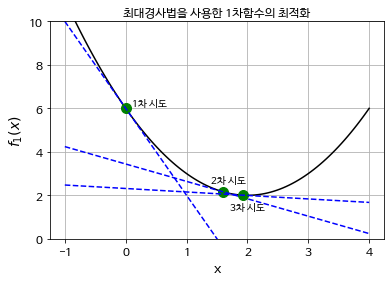

In [4]:
def f1d(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2.0)

xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) + 0.4, "2차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화")
plt.ylim(0, 10)
plt.show()    

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_2 = 4.40, g_2 = 4.80
3차 시도: x_3 = -0.88, g_3 = -5.76


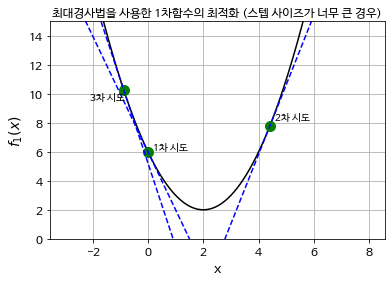

In [5]:
xx = np.linspace(-3, 8, 100)

plt.plot(xx, f1(xx), 'k-')

# step size (너무 큰 값!)
mu = 1.1

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.4, "2차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 1.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.ylim(0, 15)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화 (스텝 사이즈가 너무 큰 경우)")
plt.show()

#### 예제

2차원 Rosenbrock 함수에 대해 최대경사법을 적용해보자. 목적함수를 미분하여 도함수를 구한 다음 그레디언트 벡터를 파이썬 함수로 구현한다.
> $x=-1, y-1$에서 시작하여 최대경사법으로 최적점을 찾아나가는 과정

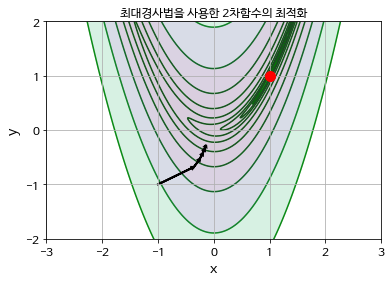

In [6]:
def f2g(x, y):
    """f2(x, y)의 도함수"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing

x, y = -1, -1
for i in range(5):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2, 2, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화")
plt.show()    

- 곡면의 모양이 **계곡(valley)**과 같이 생긴 경우, 즉 그레디언트 벡터가 최저점을 가리키고 있지 않는 경우 → **진동(oscillation) 현상**이 발생 → 수렴하기까지 시간 多
> - 진동 현상을 없애는 방법 : 2차 도함수, 즉 헤시안 행렬을 이용하는 방법이나 모멘텀 방법(momentum) 有

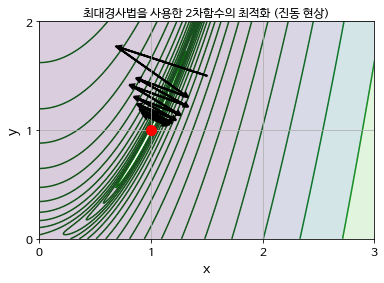

In [7]:
xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 4, 20)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 1.8e-3  # 스텝 사이즈
s = 0.95  # 화살표 크기

x, y = 1.5, 1.5
for i in range(15):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화 (진동 현상)")
plt.show()

### 4) 2차 도함수를 사용한 뉴턴 방법

- 뉴턴(Newton) 방법 : 목적함수가 2차 함수라는 가정하에 한 번에 최저점을 찾는 방법
1. 수식 : 그레디언트 벡터에 헤시안 행렬의 역행렬을 곱해서 방향과 거리가 변형된 그레디언트 벡터를 사용
> $$ 
\begin{align}
{x}_{n+1} = {x}_n - [{H}f({x}_n)]^{-1} \nabla f({x}_n) 
\end{align}
$$
2. 장점 : 스텝 사이즈가 필요없고 목적함수가 실제로 2차함수와 비슷한 모양이면 빨리 수렴할 수 있음
3. 단점 : 1차 도함수(그레디언트 벡터)뿐 아니라 2차 도함수(헤시안 행렬)도 필요로 함

- ex) 단변수 2차 함수
1. 단변수 2차 함수 식 
> $$
\begin{align}
f(x) = a(x-x_0)^2 + c = ax^2 -2ax_0x + x_0^2+c
\end{align}
$$
> - $x=x_0$에서 최솟값을 가짐

2. 단변수함수 뉴턴 방법 : 최적의 스텝 사이즈가 $\frac{1}{f''(x_n)}$이라는 것을 보여줌
> $$
\begin{align}
{x}_{n+1} = {x}_n - \dfrac{f'(x_n)}{f''(x_n)}
\end{align}
$$

3. 전개 
> $$
\begin{align}
f'(x) = 2ax - 2ax_0
\end{align}
$$
<br>
> $$
\begin{align}
f''(x) = 2a
\end{align}
$$
<br>
> $$
\begin{align}
{x}_{n+1} = {x}_n - \dfrac{2ax_n - 2ax_0}{2a} = x_n - (x_n - x_0) = x_0
\end{align}
$$

4. 결론 : 어떤 점 $x_n$에서 시작해도 바로 최저점으로 이동

### 5) 준 뉴턴 방법

- 준 뉴턴(Quasi-Newton) 방법* : 사람이 구한 헤시안 행렬 함수를 사용하는 대신 현재 시도하고 있는 $x_n$ 주변의 몇몇 점에서 함수의 값을 구하고 이를 이용하여 2차 도함수의 근사값 혹은 이에 상응하는 정보를 수치적으로 계산. 
> 준 뉴턴 방법 중에서 BFGS(Broyden–Fletcher–Goldfarb–Shanno) 방법이 많이 사용됨

- CG(conjugated gradient) 방법은 준 뉴턴 방법처럼 헤시안 행렬을 필요로 하지 않고 변형된 그레디언트 벡터를 바로 계산함

### 6) SciPy를 이용한 최적화

- BFGS 방법으로, `minimize()` 명령은 최적화할 함수와 최적화를 시작할 초깃값을 인수로 받음 참고사이트(https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

```
result = minimize(func, x0, jac=jac)
```

* `func`: 목적함수
* `x0`: 초깃값 벡터
* `jac`: (옵션) 그레디언트 벡터를 출력하는 함수

#### 예제

`minimize()` 명령으로 위에서 예로 들었던 1차원 함수를 최적화하면 다음과 같다.

In [9]:
import scipy as sp
# 목적함수 재정의
def f1(x):
    return (x - 2) ** 2 + 2

x0 = 0  # 초깃값
result = sp.optimize.minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


In [10]:
# 계산량을 줄이려면 사람이 직접 그레디언트 벡터값을 반환하는 함수를 만들어 `jac` 인수로 넣어주면 된다.

def f1p(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2)

result = sp.optimize.minimize(f1, x0, jac=f1p)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])


#### 예제

다변수 함수를 최적화하는 경우에는 목적함수가 벡터 인수를 가져야 한다.

In [11]:
# 2차원 목적함수 재정의(벡터 입력을 받도록)
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

x0 = (-2, -2)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 9.591264224301295e-12
 hess_inv: array([[0.49971058, 0.99932097],
       [0.99932097, 2.00343249]])
      jac: array([ 3.28126764e-05, -1.49149826e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 508
      nit: 54
     njev: 124
   status: 2
  success: False
        x: array([0.99999701, 0.99999395])


#### 연습 문제 5.1.1

2차원 로젠브록 함수에 대해 

(1) 최적해에 수렴할 수 있도록 초기점을 변경하여 본다.

(2) 그레디언트 벡터 함수를 구현하여 `jac` 인수로 주는 방법으로 계산 속도를 향상시킨다.

In [14]:
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

def f2p(x):
    """f2(x, y)의 도함수"""
    return np.array((2.0 * (x[0] - 1) - 400.0 * x[0] * (x[1] - x[0]**2), 200.0 * (x[1] - x[0]**2)))

x0 = (-1, -1)
result = sp.optimize.minimize(f2, x0, jac=f2p)
print(result)

      fun: 1.8499214547674284e-16
 hess_inv: array([[0.50825961, 1.01607777],
       [1.01607777, 2.03629519]])
      jac: array([ 2.76270212e-07, -1.26083144e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 31
     njev: 40
   status: 0
  success: True
        x: array([1.00000001, 1.00000002])


### 7) 전역 최적화 문제

- 최적화하려는 함수가 복수의 국소 최저점(local minima)을 가지고 있는 경우 → 수치적 최적화 방법으로 전역 최저점(global minimum)에 도달한다는 보장 X (결과는 초기 추정값 및 알고리즘, 파라미터 등에 의존)

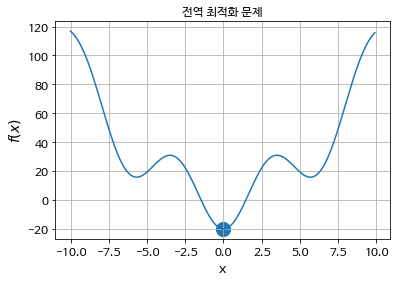

In [15]:
def f_global(x):
    """비선형 목적함수"""
    return x**2 - 20 * np.cos(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f_global(x))
plt.scatter(0, f_global(0), s=200)
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.title("전역 최적화 문제")
plt.show()

      fun: 15.791736781359312
 hess_inv: array([[0.05417267]])
      jac: array([-2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([5.67920777])


array([5.67920777])

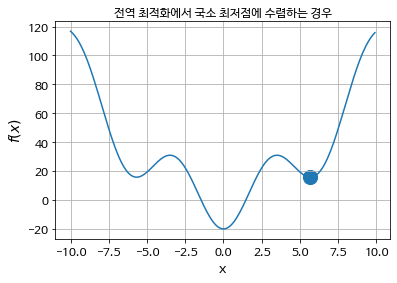

In [17]:
result = sp.optimize.minimize(f_global, 4)
print(result)
x_sol = result['x']
display(x_sol)

plt.plot(x, f_global(x));
plt.scatter(x_sol, f_global(x_sol), s=200)
plt.title("전역 최적화에서 국소 최저점에 수렴하는 경우")
plt.ylabel("$f(x)$")
plt.xlabel("x")
plt.show()

### 8) 컨벡스 문제

- 컨벡스(convex) 문제 : 목적함수의 2차 도함수의 값이 항상 0 이상이 되는 영역에서만 정의된 최적화 문제
> $$ 
\begin{align}
\dfrac{\partial^2 f}{\partial x^2} \geq 0 
\end{align}
$$

- 다변수 목적함수의 경우, 주어진 영역에서 헤시안 행렬이 항상 양의 준정부호(positive semidefinite)이라는 조건이 됨
> $$ 
\begin{align}
x^THx \geq 0 \;\;\text{for all } x 
\end{align}
$$

- 결론 : 컨벡스 문제에서는 항상 전역 최저점이 존재